# Lion Studios Take Home Task
### Yağmur Dalman

## Task 2

In [84]:
# import all packages and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [85]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('lionstudios_data_analyst_take_home.csv')
df.head()

,user_id,platform,variant,install_timestamp,country_type,session_timestamp,icon_shop_opens,inter_shop_opens,icon_cash_purchases,inter_cash_purchases,icon_revenue_usd,inter_revenue_usd,session_length,rvs_watched,levels_played
0,GZeZClCIqP,android,Control,2023-01-07T13:55:32.394Z,Non-US,2023-01-07 13:55:32,0,0,0,0,0.0,0.0,53,2,31
1,GZeZClCIqP,android,Control,2023-01-07T13:55:32.394Z,Non-US,2023-01-07 16:02:11,0,0,0,0,0.0,0.0,23,3,7
2,GZeZClCIqP,android,Control,2023-01-07T13:55:32.394Z,Non-US,2023-01-08 07:05:13,0,0,0,0,0.0,0.0,4,10,11
3,GZeZClCIqP,android,Control,2023-01-07T13:55:32.394Z,Non-US,2023-01-08 09:19:40,0,0,0,0,0.0,0.0,31,19,6
4,nPdXCigYaj,android,Control,2023-01-13T02:16:05.361Z,Non-US,2023-01-13 02:16:05,0,0,0,0,0.0,0.0,27,13,5


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73141 entries, 0 to 73140
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               73141 non-null  object 
 1   platform              73141 non-null  object 
 2   variant               73141 non-null  object 
 3   install_timestamp     73141 non-null  object 
 4   country_type          73141 non-null  object 
 5   session_timestamp     73136 non-null  object 
 6   icon_shop_opens       73141 non-null  int64  
 7   inter_shop_opens      73141 non-null  int64  
 8   icon_cash_purchases   73141 non-null  int64  
 9   inter_cash_purchases  73141 non-null  int64  
 10  icon_revenue_usd      73141 non-null  float64
 11  inter_revenue_usd     73141 non-null  float64
 12  session_length        73141 non-null  int64  
 13  rvs_watched           73141 non-null  int64  
 14  levels_played         73141 non-null  int64  
dtypes: float64(2), int6

In [87]:
df[df.duplicated()] 

,user_id,platform,variant,install_timestamp,country_type,session_timestamp,icon_shop_opens,inter_shop_opens,icon_cash_purchases,inter_cash_purchases,icon_revenue_usd,inter_revenue_usd,session_length,rvs_watched,levels_played


In [88]:
print(df['platform'].unique())
print(df['variant'].unique())
print(df['country_type'].unique())


['android' 'ios']
['Control' 'New Shop Icon']
['Non-US' 'US']


In [89]:
df["install_timestamp"] = pd.to_datetime(df["install_timestamp"], errors="coerce", utc=True)
df["session_timestamp"] = pd.to_datetime(df["session_timestamp"], errors="coerce", utc=True)
df.head()

,user_id,platform,variant,install_timestamp,country_type,session_timestamp,icon_shop_opens,inter_shop_opens,icon_cash_purchases,inter_cash_purchases,icon_revenue_usd,inter_revenue_usd,session_length,rvs_watched,levels_played
0,GZeZClCIqP,android,Control,2023-01-07 13:55:32.394000+00:00,Non-US,2023-01-07 13:55:32+00:00,0,0,0,0,0.0,0.0,53,2,31
1,GZeZClCIqP,android,Control,2023-01-07 13:55:32.394000+00:00,Non-US,2023-01-07 16:02:11+00:00,0,0,0,0,0.0,0.0,23,3,7
2,GZeZClCIqP,android,Control,2023-01-07 13:55:32.394000+00:00,Non-US,2023-01-08 07:05:13+00:00,0,0,0,0,0.0,0.0,4,10,11
3,GZeZClCIqP,android,Control,2023-01-07 13:55:32.394000+00:00,Non-US,2023-01-08 09:19:40+00:00,0,0,0,0,0.0,0.0,31,19,6
4,nPdXCigYaj,android,Control,2023-01-13 02:16:05.361000+00:00,Non-US,2023-01-13 02:16:05+00:00,0,0,0,0,0.0,0.0,27,13,5


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73141 entries, 0 to 73140
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   user_id               73141 non-null  object             
 1   platform              73141 non-null  object             
 2   variant               73141 non-null  object             
 3   install_timestamp     73141 non-null  datetime64[ns, UTC]
 4   country_type          73141 non-null  object             
 5   session_timestamp     73136 non-null  datetime64[ns, UTC]
 6   icon_shop_opens       73141 non-null  int64              
 7   inter_shop_opens      73141 non-null  int64              
 8   icon_cash_purchases   73141 non-null  int64              
 9   inter_cash_purchases  73141 non-null  int64              
 10  icon_revenue_usd      73141 non-null  float64            
 11  inter_revenue_usd     73141 non-null  float64            
 12  sess

In [91]:
# Unique users by variant
variant_counts = df.drop_duplicates("user_id")["variant"].value_counts()
variant_props  = variant_counts / variant_counts.sum()

In [92]:
# Print key stats
print("Variants present:", list(variant_counts.index))
print(f"Control users = {variant_counts.get('Control',0):,}")
print(f"Treatment users = {variant_counts.sum()-variant_counts.get('Control',0):,}")
print(f"Exposure split = {variant_props.get('Control',0):.1%} Control / {variant_props.sum()-variant_props.get('Control',0):.1%} Treatment")
print(f"Total unique users in dataset = {variant_counts.sum():,}")

Variants present: ['New Shop Icon', 'Control']
Control users = 9,396
Treatment users = 10,604
Exposure split = 47.0% Control / 53.0% Treatment
Total unique users in dataset = 20,000


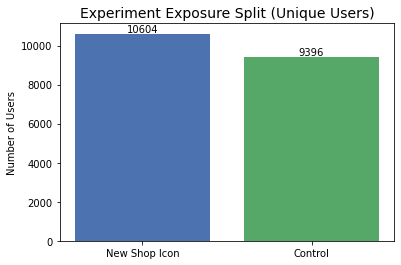

In [93]:
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(variant_counts.index, variant_counts.values, color=["#4C72B0","#55A868"])
ax.set_title("Experiment Exposure Split (Unique Users)", fontsize=14)
ax.set_ylabel("Number of Users")
ax.bar_label(bars)
plt.show()

In [94]:
# Define analysis windows
# D1/D7: Mark sessions that fall within the first 1/7 days after a user's install.
# These flags will be used to filter only D1/D7 activity per user.

df["in_D1"] = (df["session_timestamp"] >= df["install_timestamp"]) & \
              (df["session_timestamp"] <  df["install_timestamp"] + pd.Timedelta(days=1))

df["in_D7"] = (df["session_timestamp"] >= df["install_timestamp"]) & \
              (df["session_timestamp"] <  df["install_timestamp"] + pd.Timedelta(days=7))

In [95]:
# User info - one row per user with stable attributes
# We'll keep variant/platform/country + install time for later merges.

user_info = (
    df.sort_values("install_timestamp")
      .drop_duplicates("user_id")[["user_id", "variant", "platform", "country_type", "install_timestamp"]]
)

user_info.head()

,user_id,variant,platform,country_type,install_timestamp
59196,KeLp4qX229,New Shop Icon,ios,Non-US,2023-01-01 00:01:18.399000+00:00
60240,BaLTWTig3Q,New Shop Icon,ios,Non-US,2023-01-01 00:02:46.663000+00:00
5319,fiaTua1UmX,Control,android,Non-US,2023-01-01 00:02:51.304000+00:00
19024,TY36tldoj6,Control,android,Non-US,2023-01-01 00:04:47.830000+00:00
4115,m7GlMwqkcP,Control,android,Non-US,2023-01-01 00:05:09.872000+00:00


In [96]:

# Aggregate session rows to user-level within a given window
# Returns a table with 7-day (or 1-day) totals per user + derived KPIs.

agg_cols = [
    "icon_shop_opens", "inter_shop_opens",
    "icon_cash_purchases", "inter_cash_purchases",
    "icon_revenue_usd", "inter_revenue_usd",
    "session_length", "rvs_watched", "levels_played"
]

def make_user_table(flag_col: str, suffix: str) -> pd.DataFrame:
    """
    Aggregate session rows within `flag_col` window to one row per user,
    then derive user-level KPIs used in the post-experiment analysis.
    """
    # Sum session-level metrics per user within the window
    sums = df[df[flag_col]].groupby("user_id")[agg_cols].sum().add_suffix(f"_{suffix}")

    # Merge with user_info so we have variant/platform/country + totals
    u = user_info.merge(sums, left_on="user_id", right_index=True, how="left").fillna(0)

    # Derived KPIs (user-level)
    u[f"icon_ctr_{suffix}"]    = (u[f"icon_shop_opens_{suffix}"] > 0).astype(int)  # user clicked via icon at least once
    u[f"total_opens_{suffix}"] = u[f"icon_shop_opens_{suffix}"] + u[f"inter_shop_opens_{suffix}"]
    u[f"total_rev_{suffix}"]   = u[f"icon_revenue_usd_{suffix}"] + u[f"inter_revenue_usd_{suffix}"]
    # Retention proxy in the window: had any session time > 0
    u[f"retained_{suffix}"]    = (u[f"session_length_{suffix}"] > 0).astype(int)

    return u

D1_df = make_user_table("in_D1", "D1")
D7_df = make_user_table("in_D7", "D7")

In [97]:
D1_df.head()

,user_id,variant,platform,country_type,install_timestamp,icon_shop_opens_D1,inter_shop_opens_D1,icon_cash_purchases_D1,inter_cash_purchases_D1,icon_revenue_usd_D1,inter_revenue_usd_D1,session_length_D1,rvs_watched_D1,levels_played_D1,icon_ctr_D1,total_opens_D1,total_rev_D1,retained_D1
59196,KeLp4qX229,New Shop Icon,ios,Non-US,2023-01-01 00:01:18.399000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
60240,BaLTWTig3Q,New Shop Icon,ios,Non-US,2023-01-01 00:02:46.663000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
5319,fiaTua1UmX,Control,android,Non-US,2023-01-01 00:02:51.304000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
19024,TY36tldoj6,Control,android,Non-US,2023-01-01 00:04:47.830000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4115,m7GlMwqkcP,Control,android,Non-US,2023-01-01 00:05:09.872000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


In [98]:
D7_df.head()

,user_id,variant,platform,country_type,install_timestamp,icon_shop_opens_D7,inter_shop_opens_D7,icon_cash_purchases_D7,inter_cash_purchases_D7,icon_revenue_usd_D7,inter_revenue_usd_D7,session_length_D7,rvs_watched_D7,levels_played_D7,icon_ctr_D7,total_opens_D7,total_rev_D7,retained_D7
59196,KeLp4qX229,New Shop Icon,ios,Non-US,2023-01-01 00:01:18.399000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,58.0,32.0,68.0,0,0.0,0.0,1
60240,BaLTWTig3Q,New Shop Icon,ios,Non-US,2023-01-01 00:02:46.663000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,51.0,12.0,5.0,0,0.0,0.0,1
5319,fiaTua1UmX,Control,android,Non-US,2023-01-01 00:02:51.304000+00:00,0.0,1.0,0.0,0.0,0.0,0.0,138.0,63.0,83.0,0,1.0,0.0,1
19024,TY36tldoj6,Control,android,Non-US,2023-01-01 00:04:47.830000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,24.0,13.0,5.0,0,0.0,0.0,1
4115,m7GlMwqkcP,Control,android,Non-US,2023-01-01 00:05:09.872000+00:00,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,4.0,0,0.0,0.0,1


In [99]:
# Anything not labeled 'Control' is Treatment
def label_groups(u: pd.DataFrame):
    control = u[u["variant"].str.contains("Control", case=False, na=False)]
    treatment  = u[~u["variant"].str.contains("Control", case=False, na=False)]
    return control, treatment

In [100]:
# Test helpers
# - ztest_prop: 2-proportion z-test (CTR, retention)
# - welch_t: Welch's t-test for means (continuous metrics)

def ztest_prop(control_success, control_total, treatment_success, treatment_total):
    """Two-proportion z-test (for CTR, retention)."""
    count = np.array([control_success, treatment_success])
    nobs  = np.array([control_total, treatment_total])
    stat, pval = proportions_ztest(count, nobs, alternative="two-sided")
    p_control, p_treatment = count[0]/nobs[0], count[1]/nobs[1]
    rel = (p_treatment / p_control - 1) if p_control else np.nan
    return p_control, p_treatment, (p_treatment - p_control), rel, pval

def welch_t(control_values, treatment_values):
    """Welch's t-test (means)."""
    stat, pval = ttest_ind(control_values, treatment_values, equal_var=False)
    m_control, m_treatment = float(np.mean(control_values)), float(np.mean(treatment_values))
    rel = (m_treatment / m_control - 1) if m_control != 0 else np.nan
    return m_control, m_treatment, (m_treatment - m_control), rel, pval

In [101]:
# Summarize windows - prints results for D1 or D7
def summarize_window(u: pd.DataFrame, suffix: str) -> pd.DataFrame:
    control, treatment = label_groups(u)

    results = []

    # Primary KPI: Icon CTR 
    p1, p2, d_abs, d_rel, p = ztest_prop(
        control[f"icon_ctr_{suffix}"].sum(), len(control),
        treatment[f"icon_ctr_{suffix}"].sum(), len(treatment)
    )
    results.append({
        "Metric": f"Icon CTR ({suffix})",
        "Control": p1, "Treatment": p2,
        "Abs Δ": d_abs, "Rel Δ": d_rel, "p-value": p
    })

    # Shopping impact: total opens & revenue per user
    for col, label in [(f"total_opens_{suffix}", "Total opens/user"),
                       (f"total_rev_{suffix}",   "Total revenue/user")]:
        m1, m2, d, rd, p = welch_t(control[col], treatment[col])
        results.append({
            "Metric": f"{label} ({suffix})",
            "Control": m1, "Treatment": m2,
            "Abs Δ": d, "Rel Δ": rd, "p-value": p
        })

    # Guardrails 
    for col, label in [(f"session_length_{suffix}", "Session length (min)"),
                       (f"levels_played_{suffix}",  "Levels played"),
                       (f"rvs_watched_{suffix}",    "RVS watched")]:
        m1, m2, d, rd, p = welch_t(control[col], treatment[col])
        results.append({
            "Metric": f"{label} ({suffix})",
            "Control": m1, "Treatment": m2,
            "Abs Δ": d, "Rel Δ": rd, "p-value": p
        })

    # Retention
    p1, p2, d_abs, d_rel, p = ztest_prop(
        control[f"retained_{suffix}"].sum(), len(control),
        treatment[f"retained_{suffix}"].sum(), len(treatment)
    )
    results.append({
        "Metric": f"Retention ({suffix})",
        "Control": p1, "Treatment": p2,
        "Abs Δ": d_abs, "Rel Δ": d_rel, "p-value": p
    })

    # Return as DataFrame
    return pd.DataFrame(results)


In [102]:
# RUN SUMMARIES FOR D1 AND D7
summary_D1 = summarize_window(D1_df, "D1")
summary_D7 = summarize_window(D7_df, "D7")

print(summary_D1)
print(summary_D7)

                      Metric    Control  Treatment     Abs Δ     Rel Δ  \
0              Icon CTR (D1)   0.032886   0.029046 -0.003841 -0.116787   
1      Total opens/user (D1)   0.174223   0.123350 -0.050873 -0.292001   
2    Total revenue/user (D1)   0.251490   0.196435 -0.055055 -0.218914   
3  Session length (min) (D1)  18.401341  15.507261 -2.894080 -0.157275   
4         Levels played (D1)   9.390592   8.231988 -1.158604 -0.123379   
5           RVS watched (D1)   8.885802   5.692946 -3.192856 -0.359321   
6             Retention (D1)   0.387292   0.310072 -0.077221 -0.199386   

        p-value  
0  1.169387e-01  
1  2.339506e-08  
2  4.094445e-02  
3  5.670763e-10  
4  3.272407e-06  
5  8.344933e-54  
6  2.219426e-30  
                      Metric    Control  Treatment      Abs Δ     Rel Δ  \
0              Icon CTR (D7)   0.135164   0.109770  -0.025394 -0.187876   
1      Total opens/user (D7)   0.729991   0.475292  -0.254699 -0.348907   
2    Total revenue/user (D7)   1.12111

In [103]:
# SRM Check
# Drop duplicate users to count each only once
variant_counts = df.drop_duplicates("user_id")["variant"].value_counts()
variant_props  = df.drop_duplicates("user_id")["variant"].value_counts(normalize=True)

print("Exposure split (unique users):")
for v in variant_counts.index:
    print(f"{v}: {variant_counts[v]:,} users ({variant_props[v]*100:.1f}%)")

print(f"Total users: {variant_counts.sum():,}")

Exposure split (unique users):
New Shop Icon: 10,604 users (53.0%)
Control: 9,396 users (47.0%)
Total users: 20,000


## Post Experiment Analysis
### 1) For all KPIs evaluated: describe your choices in evaluating them

- **Main Metric/Primary KPI:** D7 shop icon CTR: % of new users who clicked the shop icon at least once in the first 7 days
    - This directly tests the product team’s hypothesis that a new icon increases shop entries.

- **Secondary metrics:**
    - Total shop opens per user (icon + interstitial): These show checks overall engagement with the shop.
    - Total revenue per user (icon + interstitial): These ensures business value, not just clicks.

- **Guardrails:**
    - Session length, levels played, rewarded videos watched: They are used to monitor engagement and ad monetization.
    - D7 retention ensures no negative impact on player retention.
- **D1 metrics:** I checked D1 as an early signal, but the real decision comes from D7. 

### 2) What other data about users and their behaviour would you have also liked to have to evaluate this AB test?
- Acquisition/marketing source – to see if the groups had different types of users.
- Daily install counts – to control for traffic changes or seasonality.
- Promo/shop changes – to confirm no other updates influenced the results.

### 3) For all statistical tests performed: describe those statistical tests, their assumptions, and why they are the appropriate choice
- For binary metrics like CTR and retention, I used a **two-proportion z-test.**
    - Assumptions: users are independent and sample sizes are large enough for the normal approximation to hold.
    - Why: this test directly answers whether the difference in proportions (e.g., % of users clicking the icon) between Control and Treatment is statistically significant.
- For continuous metrics (e.g., opens per user, revenue per user, session length, levels played, ads watched), I used **Welch’s t-test (ttest_ind with unequal variances).**
    - Assumptions: users are independent; with large samples, the sampling distribution of the mean is approximately normal; group variances may differ.
    - Why: Welch’s t-test is safer than the standard t-test when variances or sample sizes are not equal, which is common in behavioral data.

- I also ran an SRM check (Sample Ratio Mismatch) by comparing the observed Control/Treatment split to the expected allocation.
    - The observed split was ~42/58 instead of the proposed 20/80, which looks like an intentional shift toward 50/50.
    - Why: SRM checks confirm randomization is working and results are valid; in this case, there was no issue.

### 4) What was the outcome of the experiment?
- The primary KPI (D7 icon CTR) decreased: Control was 13.5% and Treatment 11.0%, a drop of 2.5 percentage points (−18.8% relative), which was highly significant (p<0.001).

- Looking at secondary metrics, Treatment users had ~35% fewer total shop opens and ~40% lower total revenue per user, both statistically significant.

- Guardrails also went in the wrong direction: session length fell by ~25%, levels played by ~23%, rewarded video views by ~44%, and D7 retention dropped by about 4 percentage points.

- D1 results showed a small drop in CTR (−0.4pp) in Treatment, but this was not statistically significant.

- When I cut the data by platform and geography, the negative effects were consistent across Android and iOS as well as US and non-US users.

### 5) How confident are you in this result? Why?

- Large sample size (>9k users per group).
- Effects are big and highly significant.
- Same negative trend shows up across metrics, time windows (D1, D7), and segments (Android/iOS, US/Non-US).
- SRM check confirmed no randomization issue (42/58 split looks intentional).
- Overall: very confident the new icon had a negative impact.

### 6) What are your recommendations for Product as a result of this outcome?

- Do not ship the new shop icon — it lowered CTR, revenue, and engagement.
- Roll back to the control design.
- For future tests:
    - Test smaller, isolated changes (for example, just the visual style or just the placement) to better understand what drives user behavior).
    - Keep monitoring guardrail metrics alongside CTR.
    - Investigate why interstitial shop opens also dropped, since this may explain the revenue decline.